![image info](https://ineuron.ai/images/ineuron-logo.png)

# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("./data/CC GENERAL.csv")

# Print shape of dataset
print(df.shape)

(8950, 18)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

CREDIT_LIMIT 0.01117 % missing values
MINIMUM_PAYMENTS 3.49721 % missing values


**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

In [3]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

CREDIT_LIMIT  MINIMUM_PAYMENTS
count   8949.000000       8637.000000
mean    4494.449450        864.206542
std     3638.815725       2372.446607
min       50.000000          0.019163
25%     1600.000000        169.123707
50%     3000.000000        312.343947
75%     6500.000000        825.485459
max    30000.000000      76406.207520

In [4]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### Imputing Null values

* **Impute Median value for MINIMUM_PAYMENTS column**
* **Impute Median for CREDIT_LIMIT column**

In [5]:
#Minimum payments
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)
# Credit limit
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [6]:
df.duplicated().sum()

0

**There are no duplicates in the dataset**

**Remove Customer ID from the dataset as it cannot used in Model Training**

In [7]:
df.drop('CUST_ID', inplace=True, axis=1)

# Feature Engineering

### Type of Features

**Numeric Features**

In [8]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 17


**Categorical Features**

In [9]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete Features**

In [10]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


**Continues Features**

In [11]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 16


### Multicollinearity Check

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [13]:
compute_vif(num_features, df)

Variable           VIF
0                            BALANCE      2.659548
1                  BALANCE_FREQUENCY      1.309603
2                          PURCHASES  48156.703161
3                   ONEOFF_PURCHASES  29073.254792
4             INSTALLMENTS_PURCHASES   8618.756071
5                       CASH_ADVANCE      2.870797
6                PURCHASES_FREQUENCY     10.797447
7         ONEOFF_PURCHASES_FREQUENCY      3.956943
8   PURCHASES_INSTALLMENTS_FREQUENCY      9.504382
9             CASH_ADVANCE_FREQUENCY      3.511863
10                  CASH_ADVANCE_TRX      3.209859
11                     PURCHASES_TRX      3.150178
12                      CREDIT_LIMIT      1.836740
13                          PAYMENTS      2.667489
14                  MINIMUM_PAYMENTS      1.243168
15                  PRC_FULL_PAYMENT      1.337916
16                            TENURE      1.120686

 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 
 
**- This Dataset columns has Multi collinearity we can reduce dimension using PCA**

### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

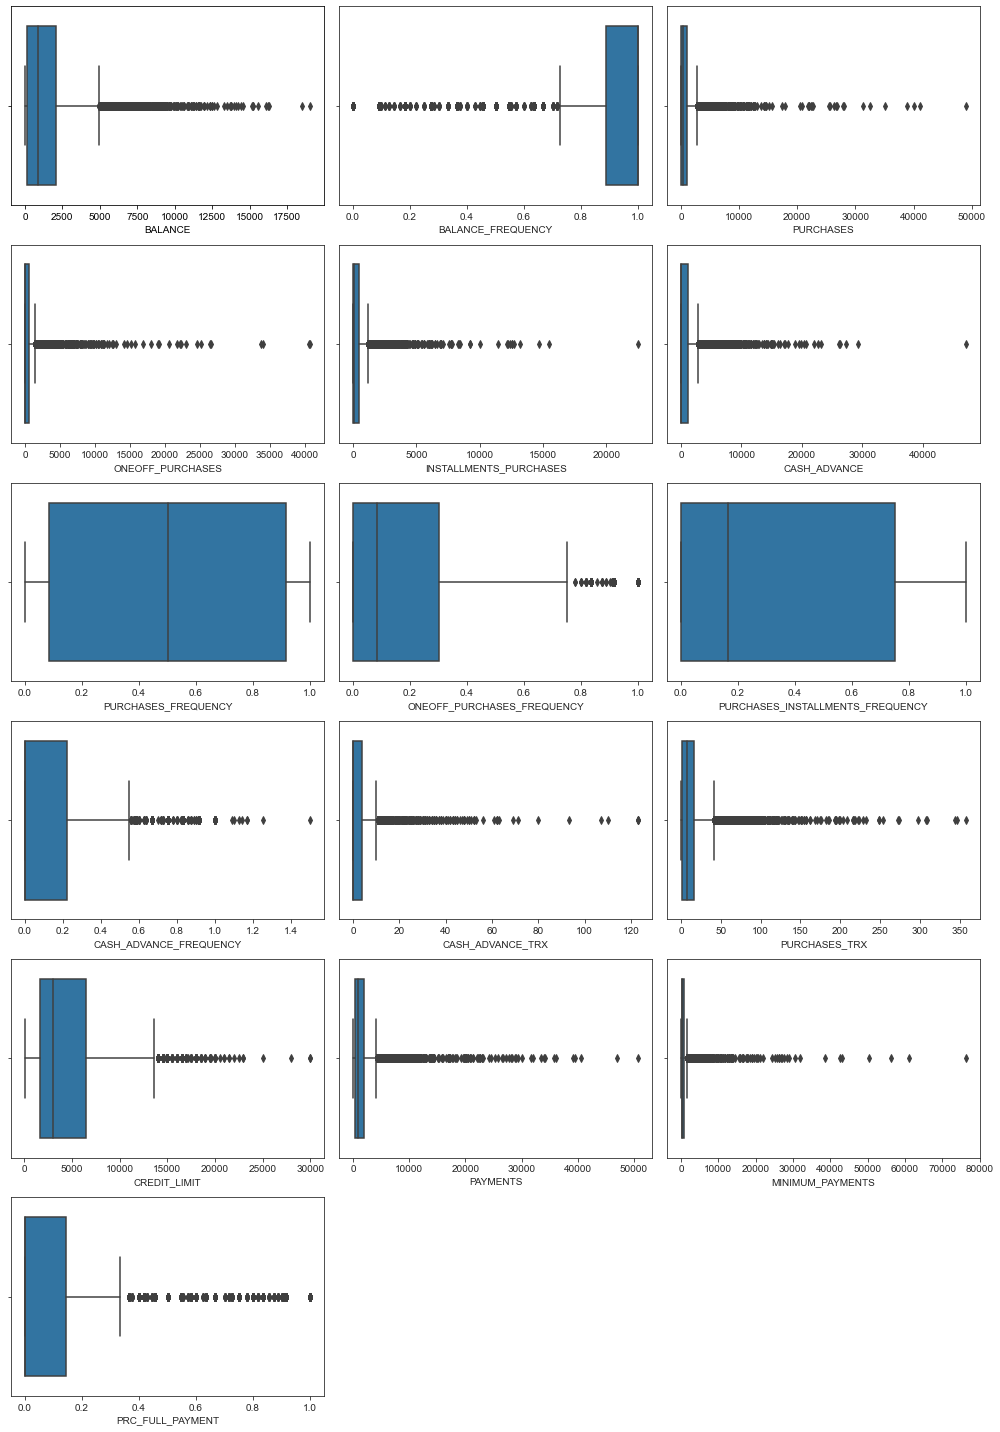

In [14]:
plt.figure(figsize=(14,20))

for i in range(len(continuous_features)):
        plt.subplot(6, 3, i+1)
        sns.set_style('ticks')
        ax = sns.boxplot(df[continuous_features[i]])
        plt.tight_layout()

**Detecting Outlier and Capping it**

In [15]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [16]:
for col in continuous_features:
          detect_outliers(col)


 #### BALANCE ####
percentile25 128.2819155
percentile75 2054.1400355
Upper limit 4942.9272155
Lower limit -2760.5052645

 #### BALANCE_FREQUENCY ####
percentile25 0.888889
percentile75 1.0
Upper limit 1.1666664999999998
Lower limit 0.7222225000000001

 #### PURCHASES ####
percentile25 39.635
percentile75 1110.13
Upper limit 2715.8725000000004
Lower limit -1566.1075000000003

 #### ONEOFF_PURCHASES ####
percentile25 0.0
percentile75 577.405
Upper limit 1443.5124999999998
Lower limit -866.1075

 #### INSTALLMENTS_PURCHASES ####
percentile25 0.0
percentile75 468.6375
Upper limit 1171.59375
Lower limit -702.95625

 #### CASH_ADVANCE ####
percentile25 0.0
percentile75 1113.8211392500002
Upper limit 2784.5528481250003
Lower limit -1670.7317088750003

 #### PURCHASES_FREQUENCY ####
percentile25 0.083333
percentile75 0.916667
Upper limit 2.166668
Lower limit -1.166668

 #### ONEOFF_PURCHASES_FREQUENCY ####
percentile25 0.0
percentile75 0.3
Upper limit 0.75
Lower limit -0.44999999999999996

 

### After Outlier Treatment

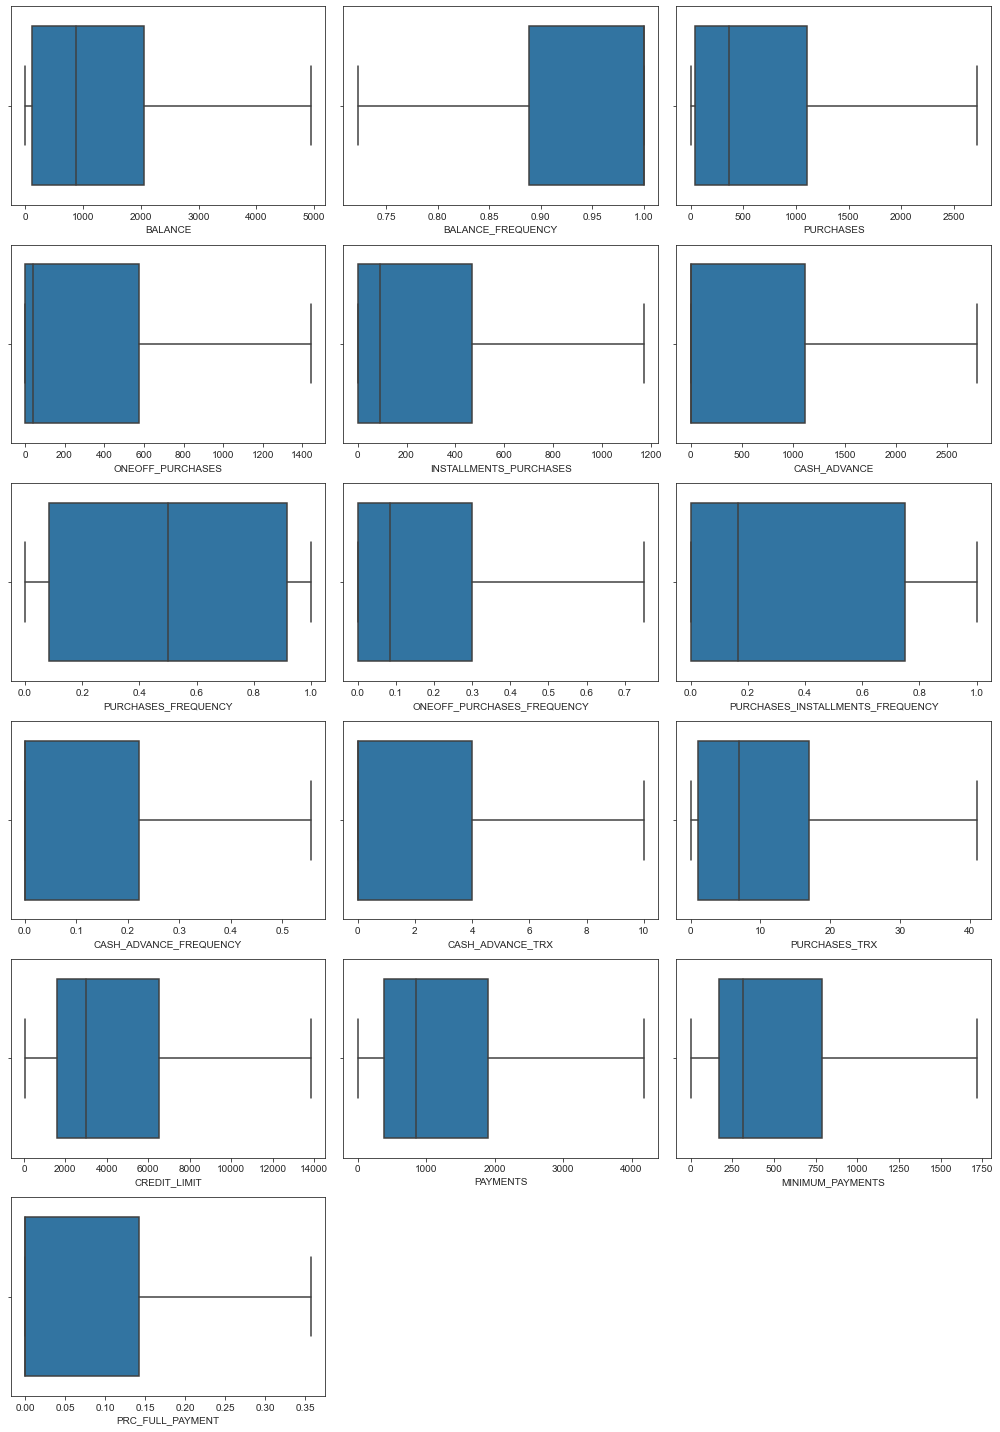

In [17]:
plt.figure(figsize=(14,20))

for i in range(len(continuous_features)):
        plt.subplot(6, 3, i+1)
        sns.set_style('ticks')
        ax = sns.boxplot(df[continuous_features[i]])
        plt.tight_layout()

# Feature Scaling

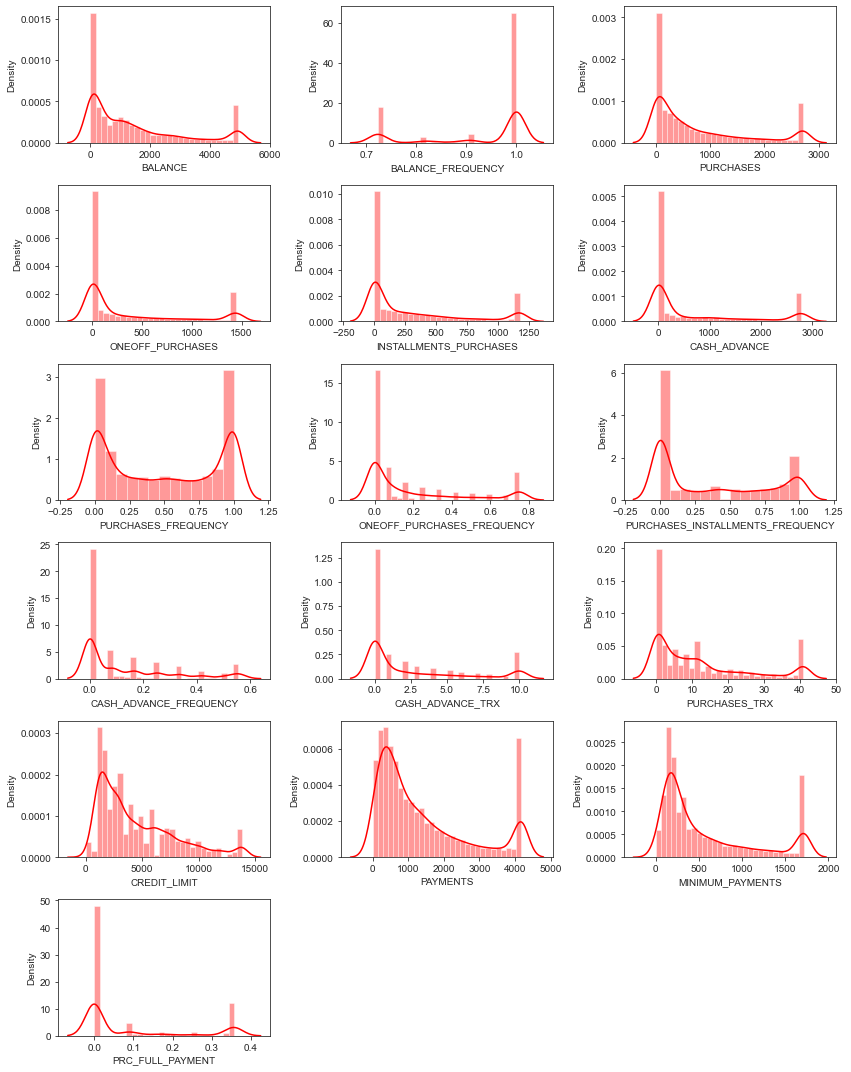

In [18]:
# distribution of data before scaling
plt.figure(figsize=(12, 15))

for i in range(len(continuous_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=df[continuous_features[i]], color='r')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()

### Power Transformer
* The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation
* The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.
* Yeo-Johnson supports both positive or negative data.

* **Scaling the data**

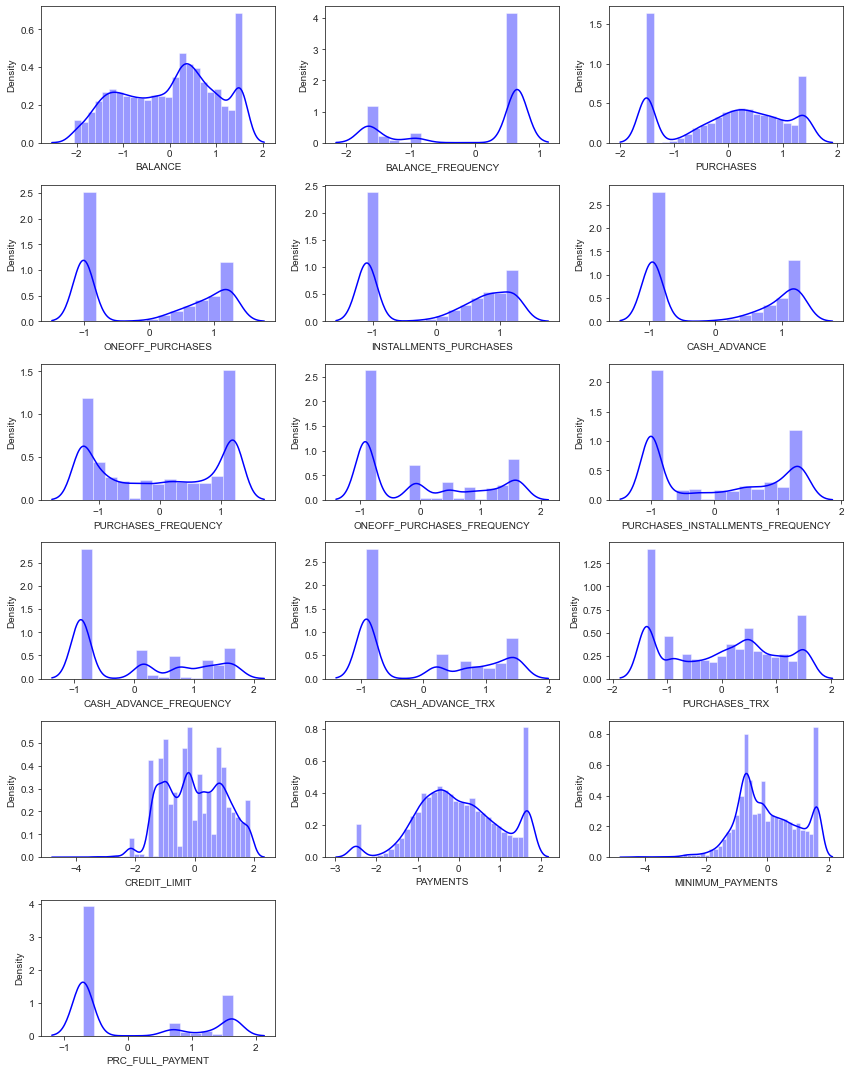

In [19]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
dfscaled = df.copy()
dfscaled[:] = PowerTransformer().fit_transform(dfscaled)
plt.figure(figsize=(12, 15))
for i in range(len(continuous_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=dfscaled[continuous_features[i]], color='b')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()

### **Checking Skewness after Outlier Capping**

In [20]:
dfscaled[continuous_features].skew(axis=0, skipna=True).to_frame()

0
BALANCE                          -0.177956
BALANCE_FREQUENCY                -0.916150
PURCHASES                        -0.297026
ONEOFF_PURCHASES                  0.083224
INSTALLMENTS_PURCHASES           -0.054007
CASH_ADVANCE                      0.171678
PURCHASES_FREQUENCY              -0.044848
ONEOFF_PURCHASES_FREQUENCY        0.504738
PURCHASES_INSTALLMENTS_FREQUENCY  0.217056
CASH_ADVANCE_FREQUENCY            0.477566
CASH_ADVANCE_TRX                  0.356510
PURCHASES_TRX                    -0.054025
CREDIT_LIMIT                     -0.018522
PAYMENTS                         -0.050058
MINIMUM_PAYMENTS                 -0.005186
PRC_FULL_PAYMENT                  0.812654

# Model Building

Here for Clustering Problem statement, 4 Algorithms are used.
* K-Means Clustering
* Agglomerative Clustering
* Gaussian Mixture
* DBSCAN

## Create a Function for Silhoutte score plot

In [21]:
# this function we take it from sklearn page for ploting silhouette with little Modification 
#ploting silhouette_plot aside with clustring results in PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## PCA (Principal Component Analysis)

There is many high correlation feature so we will use some dimentinality reduction. 
We can use PCA

* Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

* Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [22]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(dfscaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

### The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 

<AxesSubplot:>

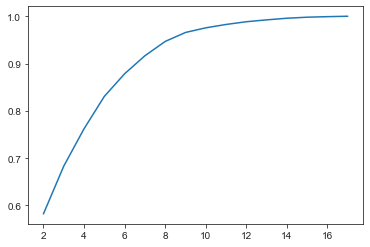

In [23]:
# plotting variance ratio
pd.Series(var_ratio).plot()

### Choosing PCA` n_components` and Kmeans `n_clusters` based on Clustering metrics

In [24]:
# apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(dfscaled)
    for x in range(2, 7):
        kmeans = KMeans(n_clusters = x,)
        label = kmeans.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '-  Inertia: ',kmeans.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.44130068091404606 -  Inertia:  46805.75042005376
Silhouette-Score for 3 Clusters:  0.4421349948753057 -  Inertia:  28000.625643262603
Silhouette-Score for 4 Clusters:  0.4366595744580097 -  Inertia:  20382.471362318647
Silhouette-Score for 5 Clusters:  0.38871568541843826 -  Inertia:  17102.39504818502
Silhouette-Score for 6 Clusters:  0.39881855861107907 -  Inertia:  13895.258579512714

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3783818739824119 -  Inertia:  62141.1511578997
Silhouette-Score for 3 Clusters:  0.3719630331175083 -  Inertia:  43313.745467967485
Silhouette-Score for 4 Clusters:  0.39192612138308475 -  Inertia:  34510.12017941522
Silhouette-Score for 5 Clusters:  0.4042323154110028 -  Inertia:  26785.95472450477
Silhouette-Score for 6 Clusters:  0.3639061068394835 -  Inertia:  23401.150534703207

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.34081801379706866 -  Inerti

**Report**
* **We can go with PCA with 2 components.**
* **We can go with Kmeans Clusters in the range of 3-5 as it has Good score with lesser Inertia compared to others**

In [25]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=2,random_state=42).fit(dfscaled)

reduced=pca_final.fit_transform(dfscaled)

In [26]:
pcadf = pd.DataFrame(reduced) 
pcadf.columns = ['PC1', 'PC2'] 
  
pcadf.head(10)

PC1       PC2
0  0.228171 -3.320507
1  3.475161  0.879714
2 -1.301709  1.286632
3  1.332546 -0.392723
4  1.013260 -1.462602
5 -1.269259  0.430818
6 -4.248961  1.664251
7 -1.583661 -0.159666
8 -1.224464  0.207567
9 -0.636276 -1.069199

In [27]:
pca_final.explained_variance_ratio_

array([0.35805564, 0.2240859 ])

### Elbow Method to find best Clusters for K-Means
* In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

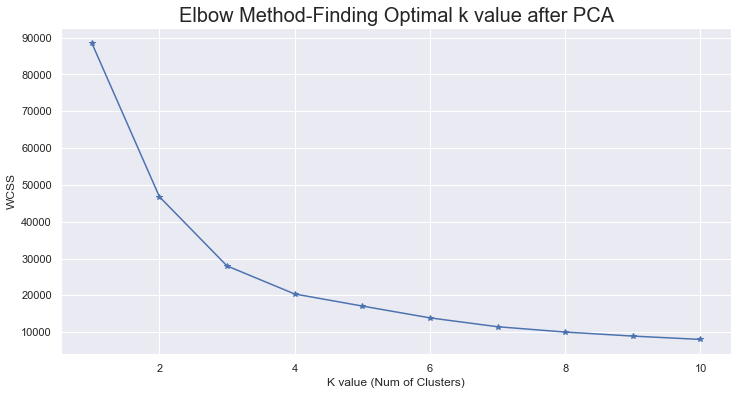

In [28]:
# model building, elbow method
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

* **Here the optimum number of cluster is 3 or 4 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.**

## Silhoutte Score Plot for K-Means to choose best number of clusters

For n_clusters = 3 The average silhouette_score is : 0.4422160747990039
For n_clusters = 4 The average silhouette_score is : 0.43662707801629613
For n_clusters = 5 The average silhouette_score is : 0.388624115011133
For n_clusters = 6 The average silhouette_score is : 0.39895808396362126


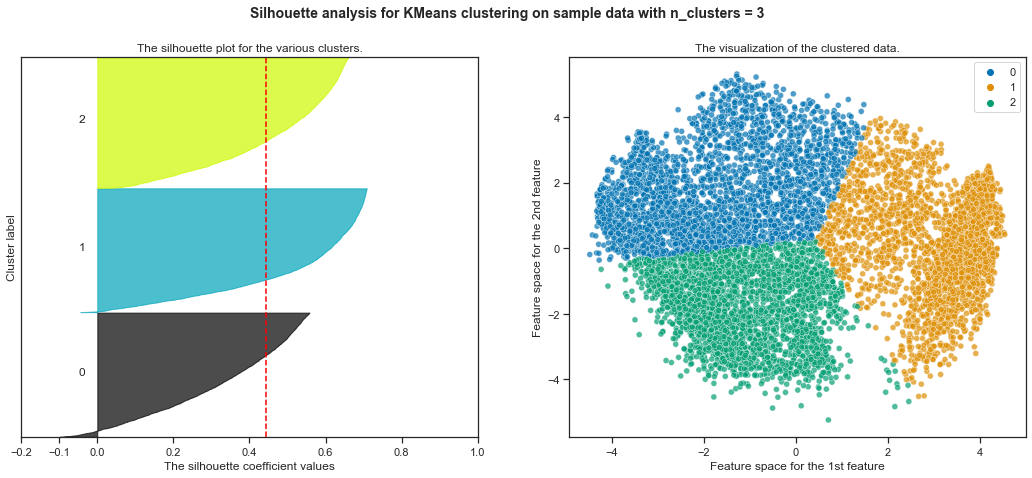

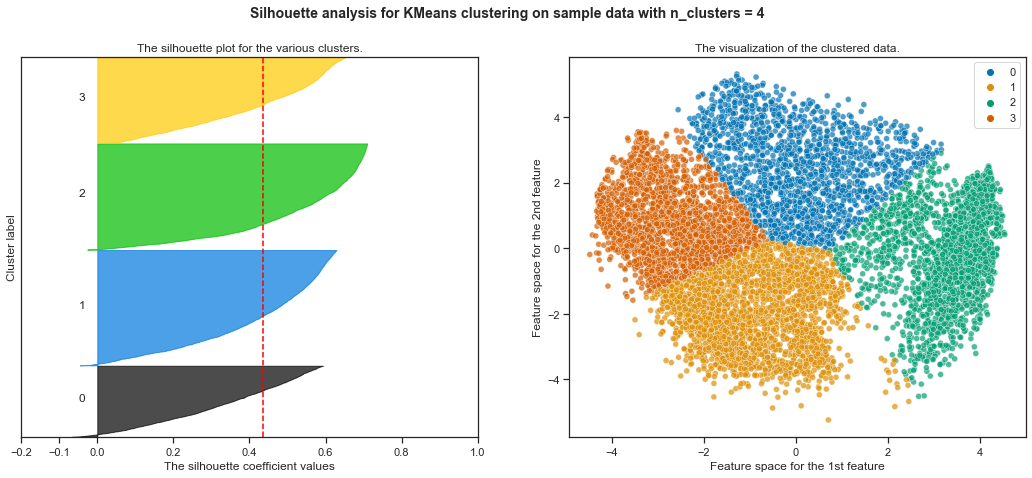

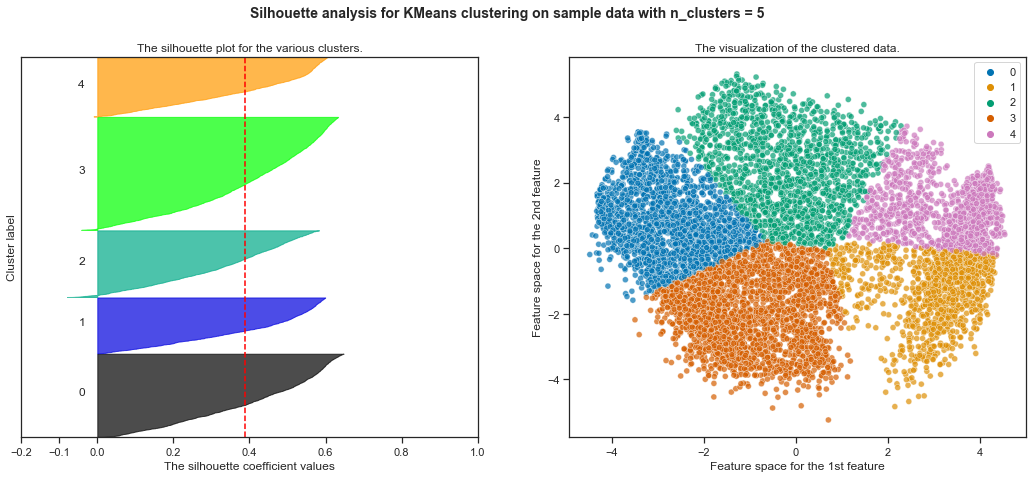

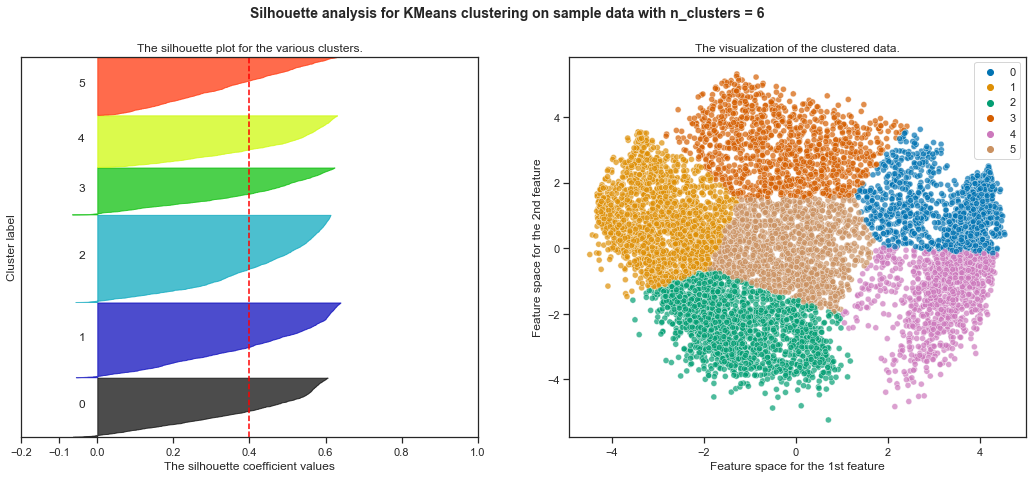

In [29]:
# We plot silhoutte score for Kmeans
# Here pcadf is pca dataframe, and Reduced is array of data after PCA.
sns.set_style('ticks')
silhouette_plot(KMeans,range(3,7), pcadf, reduced)

### Avg Silhouette-Score for 3 Clusters:  0.4422 -  Inertia:  28000.62

### Avg Silhouette-Score for 4 Clusters:  0.4366 -  Inertia:  20382.85

* Clusters of 4 has good balance of Inertia and Shilloute score, we can go with with 4 clusters.

### Apply Kmeans Clustering with 4 clusters

In [30]:
# Fitting the model to reduced data
model = KMeans(n_clusters=4).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

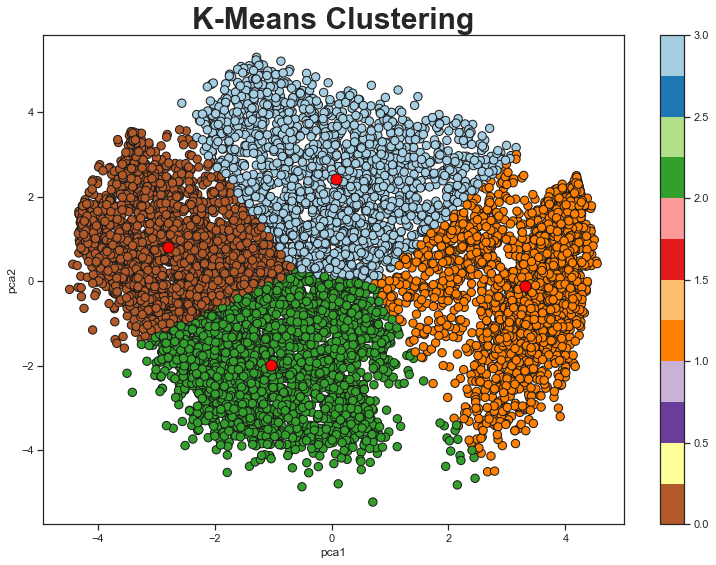

In [31]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k');

# Hierarchical clustering (Agglomerative)

* Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). 
* A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. 
* Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

## Silhoutte Score Plot for Agglomerative Clustering to choose best number of clusters 
**We go with the `n_clusters` range of 3-7 to find the best cluster for Agglomerative clustering**

For n_clusters = 3 The average silhouette_score is : 0.38822687415362145
For n_clusters = 4 The average silhouette_score is : 0.3725991051790959
For n_clusters = 5 The average silhouette_score is : 0.3747878020974013
For n_clusters = 6 The average silhouette_score is : 0.35492551908961606
For n_clusters = 7 The average silhouette_score is : 0.33231857675131304


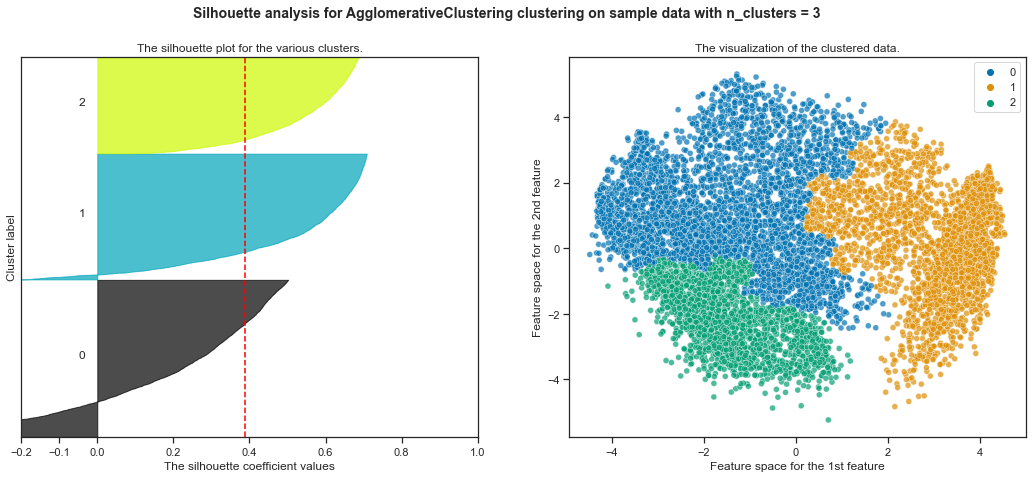

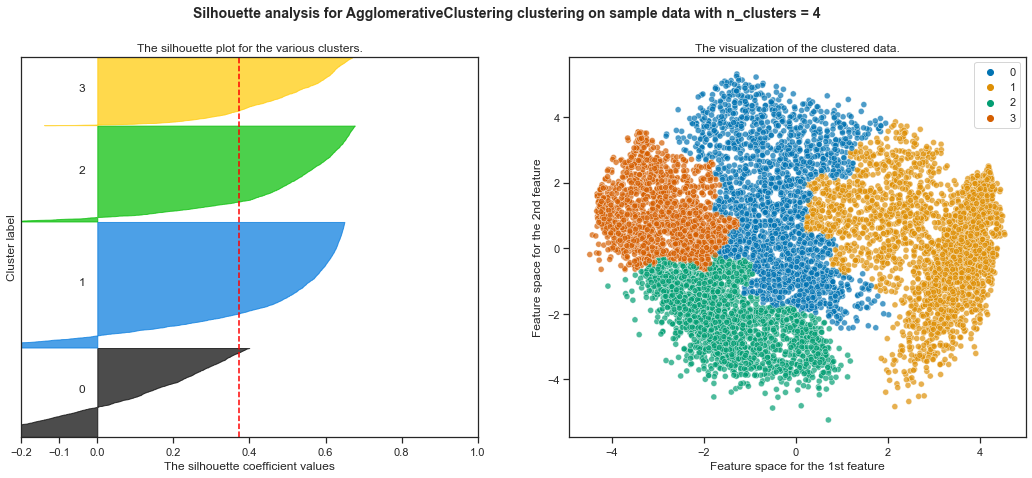

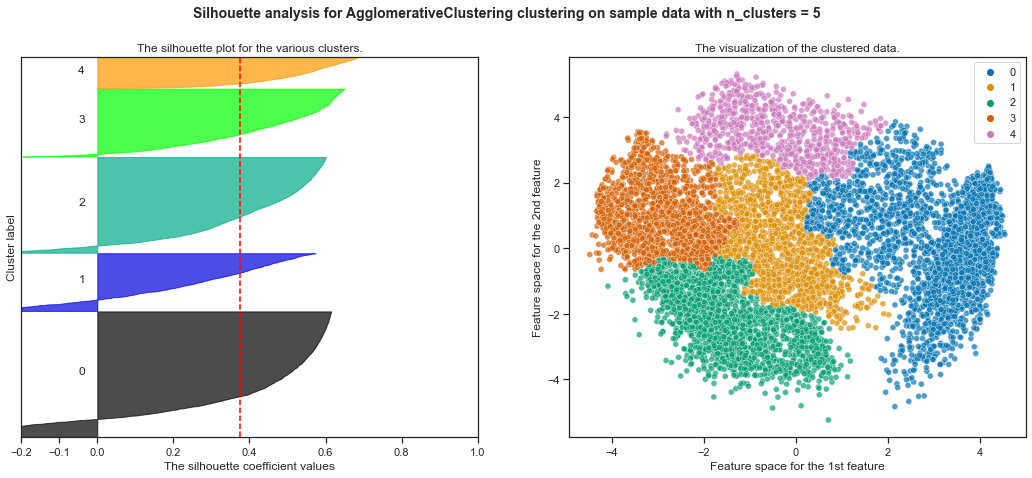

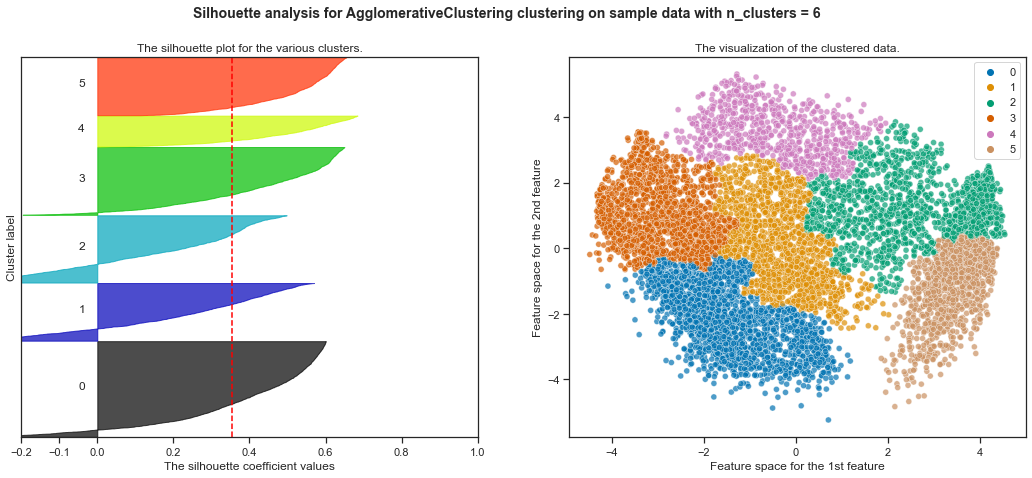

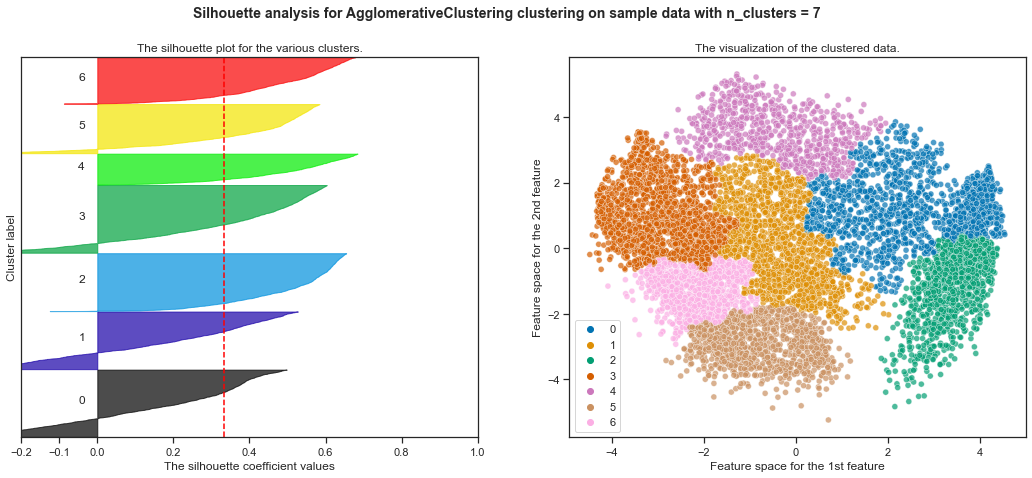

In [32]:
from sklearn.cluster import AgglomerativeClustering
#Plot Score to choose best clusters
silhouette_plot(AgglomerativeClustering,range(3,8),pcadf,reduced)

### Dendogram to choose best number of Clusters

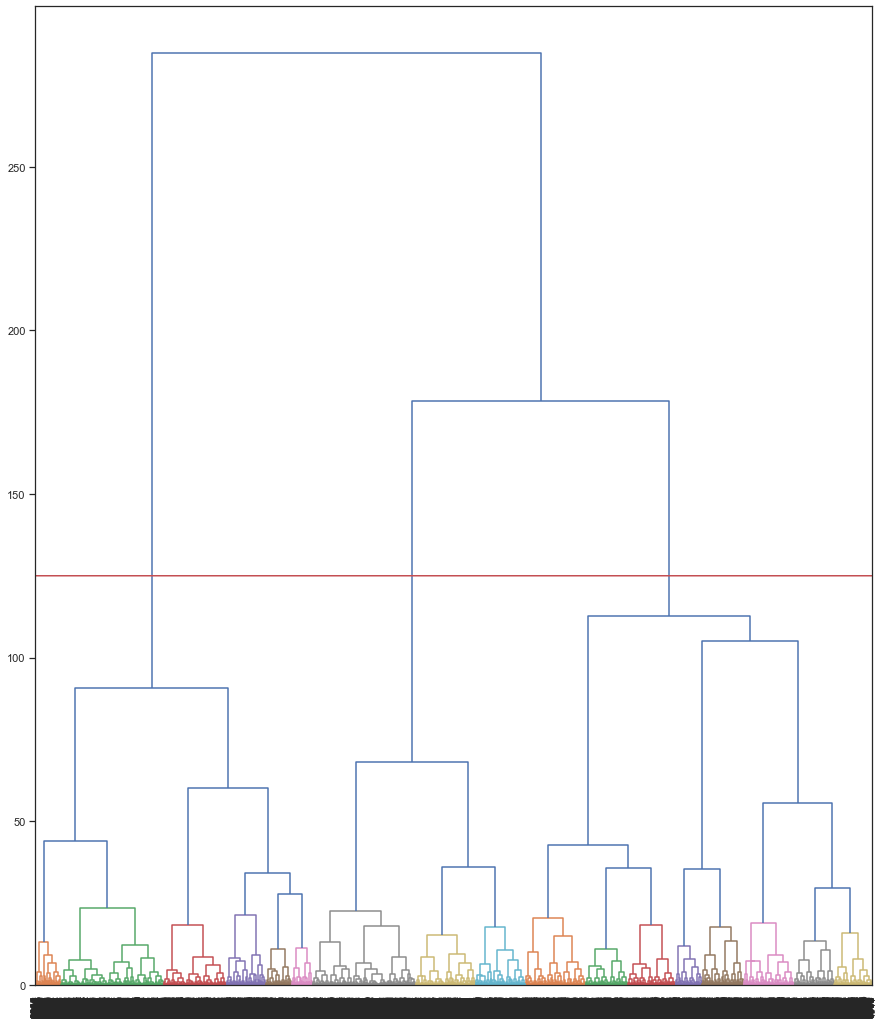

In [34]:
#Using Dendogram to choose the number of clusters 
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(15,18))
merg=linkage(pcadf,method='ward')
dendrogram(merg,p=30,leaf_rotation=90,color_threshold=25,leaf_font_size=10,truncate_mode='level')
plt.plot([125]*2000000, color='r')
plt.show()

### Visualization of Agglomerative Clustering.

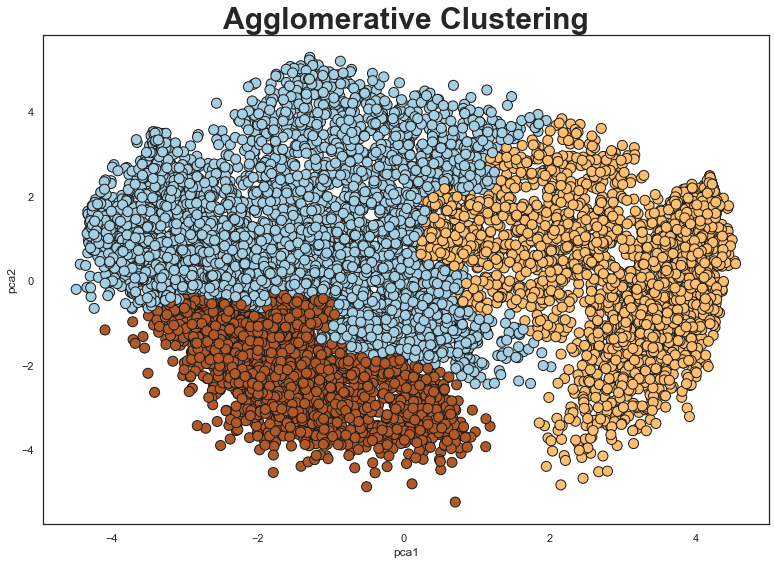

In [35]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward').fit(reduced)
model_label = model.labels_
plt.figure(figsize=(13,9))

sns.set_style('white')
plt.title('Agglomerative Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, cmap='Paired', ec='k')

**Report**
* Agglomerative clustering didn't perform well like K means clustering.
* The best Silhoutte score was 0.38, were as K means had 0.43 Silhoutte score.

# Gaussian Mixture

- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
- One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

For n_clusters = 3 The average silhouette_score is : 0.3622456918386436
For n_clusters = 4 The average silhouette_score is : 0.40032171197185906
For n_clusters = 5 The average silhouette_score is : 0.309166123970489
For n_clusters = 6 The average silhouette_score is : 0.286010121001952
For n_clusters = 7 The average silhouette_score is : 0.359581456772139


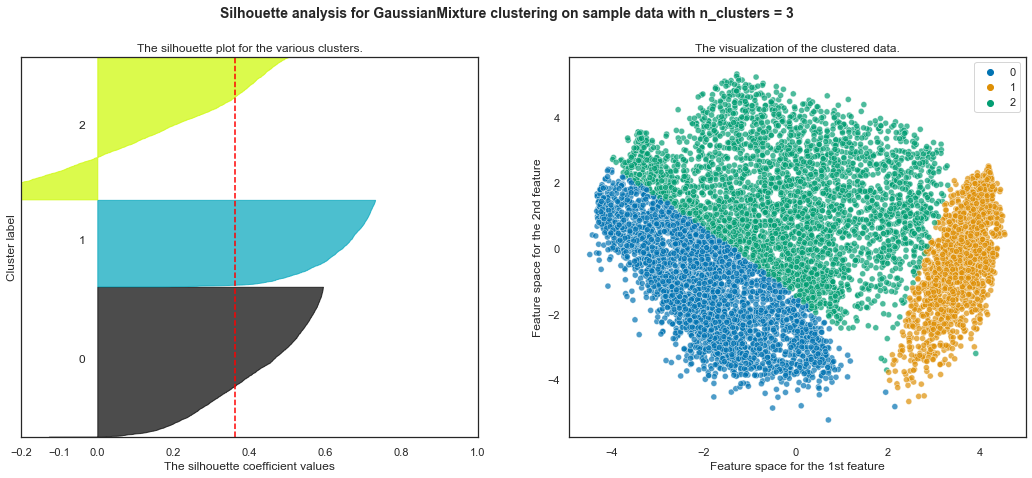

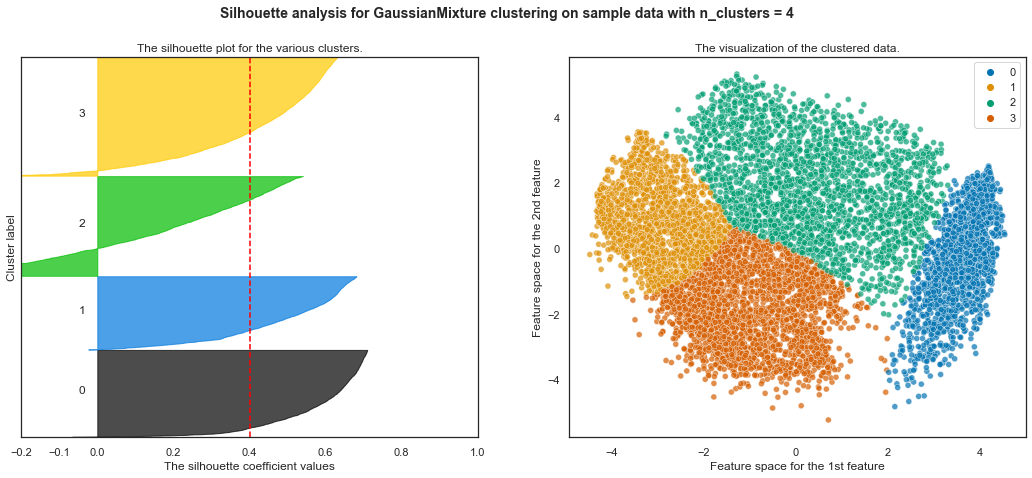

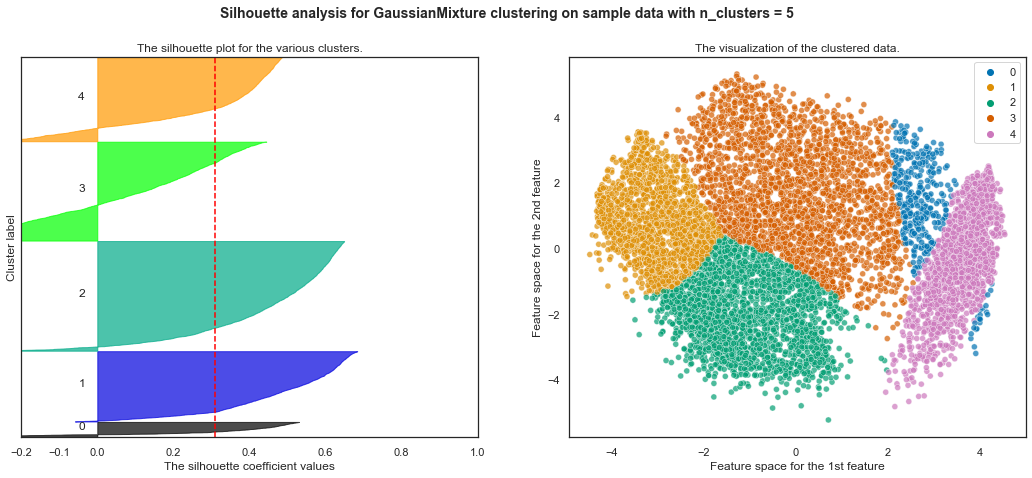

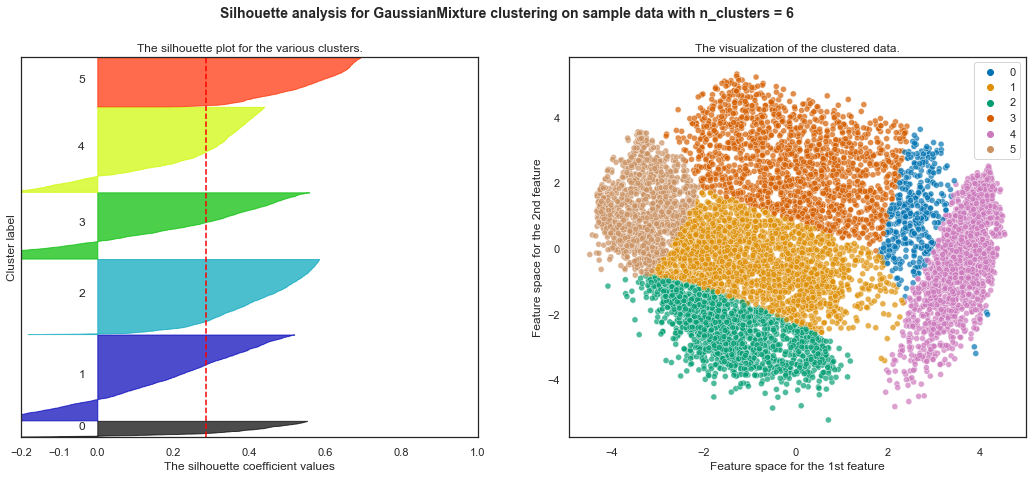

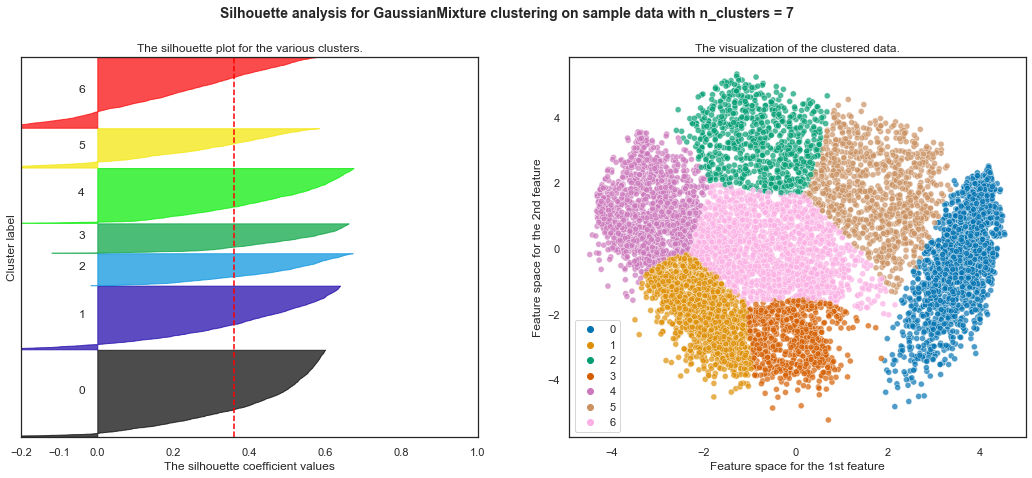

In [37]:
#plotting silhoutte score for Gaussian score
from sklearn.mixture import GaussianMixture
silhouette_plot(GaussianMixture,range(3,8),pcadf,reduced)

### For n_clusters = 4 The average silhouette_score is : 0.4003

* **which is highest score among others. So we go with Gaussian Mixture clustering with 4 Clusters.**

### Visualization for Gaussian Mixture

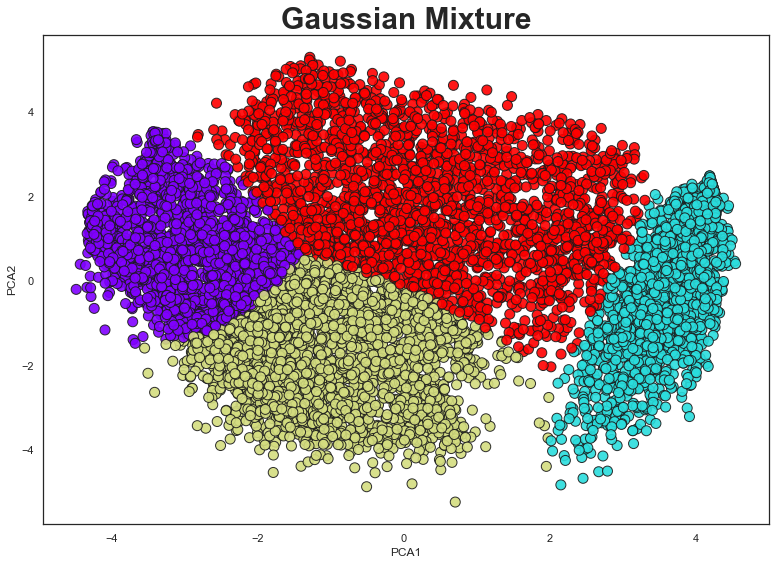

In [38]:
#plotting gaussian mixture with 4 clusters
model = GaussianMixture(n_components=4,random_state=42).fit(reduced)
model_label = model.predict(reduced)
plt.figure(figsize=(13,9))

sns.set_style('white')
plt.title('Gaussian Mixture', weight='bold', size=30)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, cmap='rainbow', ec='k', alpha=0.9)

## DBSCAN Clustering

* Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm.
* DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.

**Minimum Points minPts**

In DBSCAN minPts is the minimum number of data points that should be there in the region to define the cluster. You can choose the value of minPts based on your domain knowledge. But if you lack domain knowledge a good reference point is to have minPts ≥ D + 1 where D is the dimension of the dataset.

It is recommended to keep the value for the minPts at least 3, but for larger data sets, a greater minPts value should be chosen, especially if it has many outliers.

### Finding the Optimal value of Epsilon

Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected.

The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.

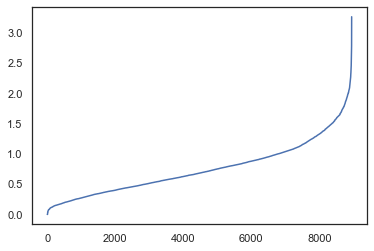

In [39]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=17)
neighbors_fit = neighbors.fit(dfscaled)
distances, indices = neighbors_fit.kneighbors(dfscaled)

distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.show()

### **Kneedle algorithm**
* We’ll use the Kneedle algorithm here via Kevin Arvai’s excellent Python implementation called Kneed. You can download this via PyPi by entering `pip3 install kneed` into your terminal and then importing the package with `from kneed import KneeLocator`.

<Figure size 360x360 with 0 Axes>

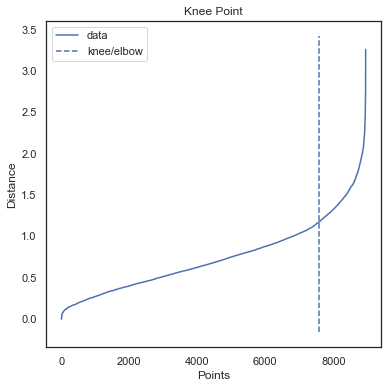

Knee Locator k = 1.1715263249661068


In [40]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= distances[knee.knee]
print('Knee Locator k =', k)

### For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).

**DBSCAN algorithm works with two parameters.**

These parameters are:

* Epsilon (Eps): This is the least distance required for two points to be termed as a neighbor. This distance is known as Epsilon (Eps). Thus we consider Eps as a threshold for considering two points as neighbors, i.e., if the distance between two points is utmost Eps, then we consider the two points to be neighbors.

* MinPoints: This refers to the minimum number of points needed to construct a cluster. We consider MinPoints as a threshold for considering a cluster as a cluster. A cluster is only recognized if the number of points is greater than or equal to the MinPts.

If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension


### Plot using PCA

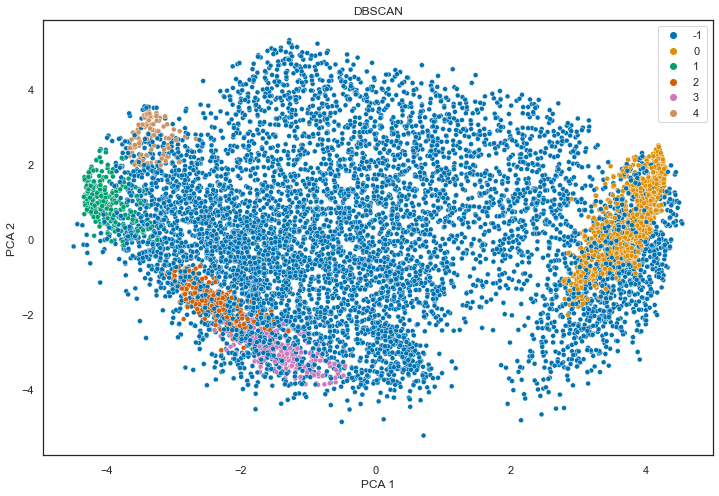

In [41]:
model=DBSCAN(eps=k , min_samples=100).fit(dfscaled)
model_label = model.labels_
plt.figure(figsize=(12,8))

plt.title('DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
scatter = sns.scatterplot(reduced[:,0], reduced[:,1], hue= model_label,
                      palette=sns.color_palette("colorblind", len(set(model_label))), s=25, cmap='Paired')

* **DBSCAN didn't perform well in clustering.**
* Its clear that DBSCAN does not work to well when we are dealing with clusters of varying densities or with high dimensional data
* clusters with -1 values are outliers of each clusters.

### Report
### From the above Models K means clustering has performed well with 3 and 4 clusters. if we take K-means Inertia into consideration we have choosen `n_clusters=4`.

## Final Model

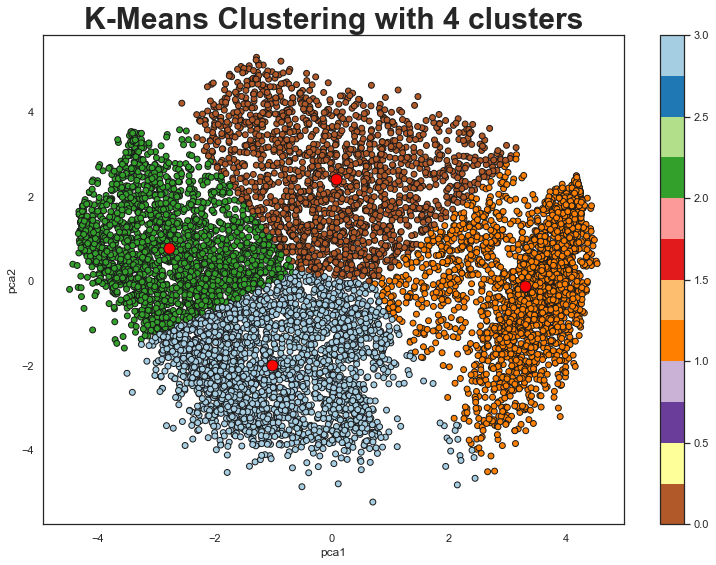

In [42]:
model = KMeans(n_clusters=4, init='k-means++').fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering with 4 clusters', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=35, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k')

## Visualizing Decision Tree for Better Business Understanding.

In [43]:
#save model labels as new feature
df["cluster"] = model.labels_.astype(int)

### Split X(Train) and y(Test)

In [44]:
#Create two X and y dataframe
df1 = df.copy()
X= df1.drop('cluster', axis=1)
cols = X.columns
y = df['cluster']
X = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X, columns=cols)

## Decision Tree Classification for Visualization

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_builder =DecisionTreeClassifier(max_depth = 3)
treeviz = tree_builder.fit(X[['BALANCE',
'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'PURCHASES_FREQUENCY',
'MINIMUM_PAYMENTS',
'CREDIT_LIMIT']], y)

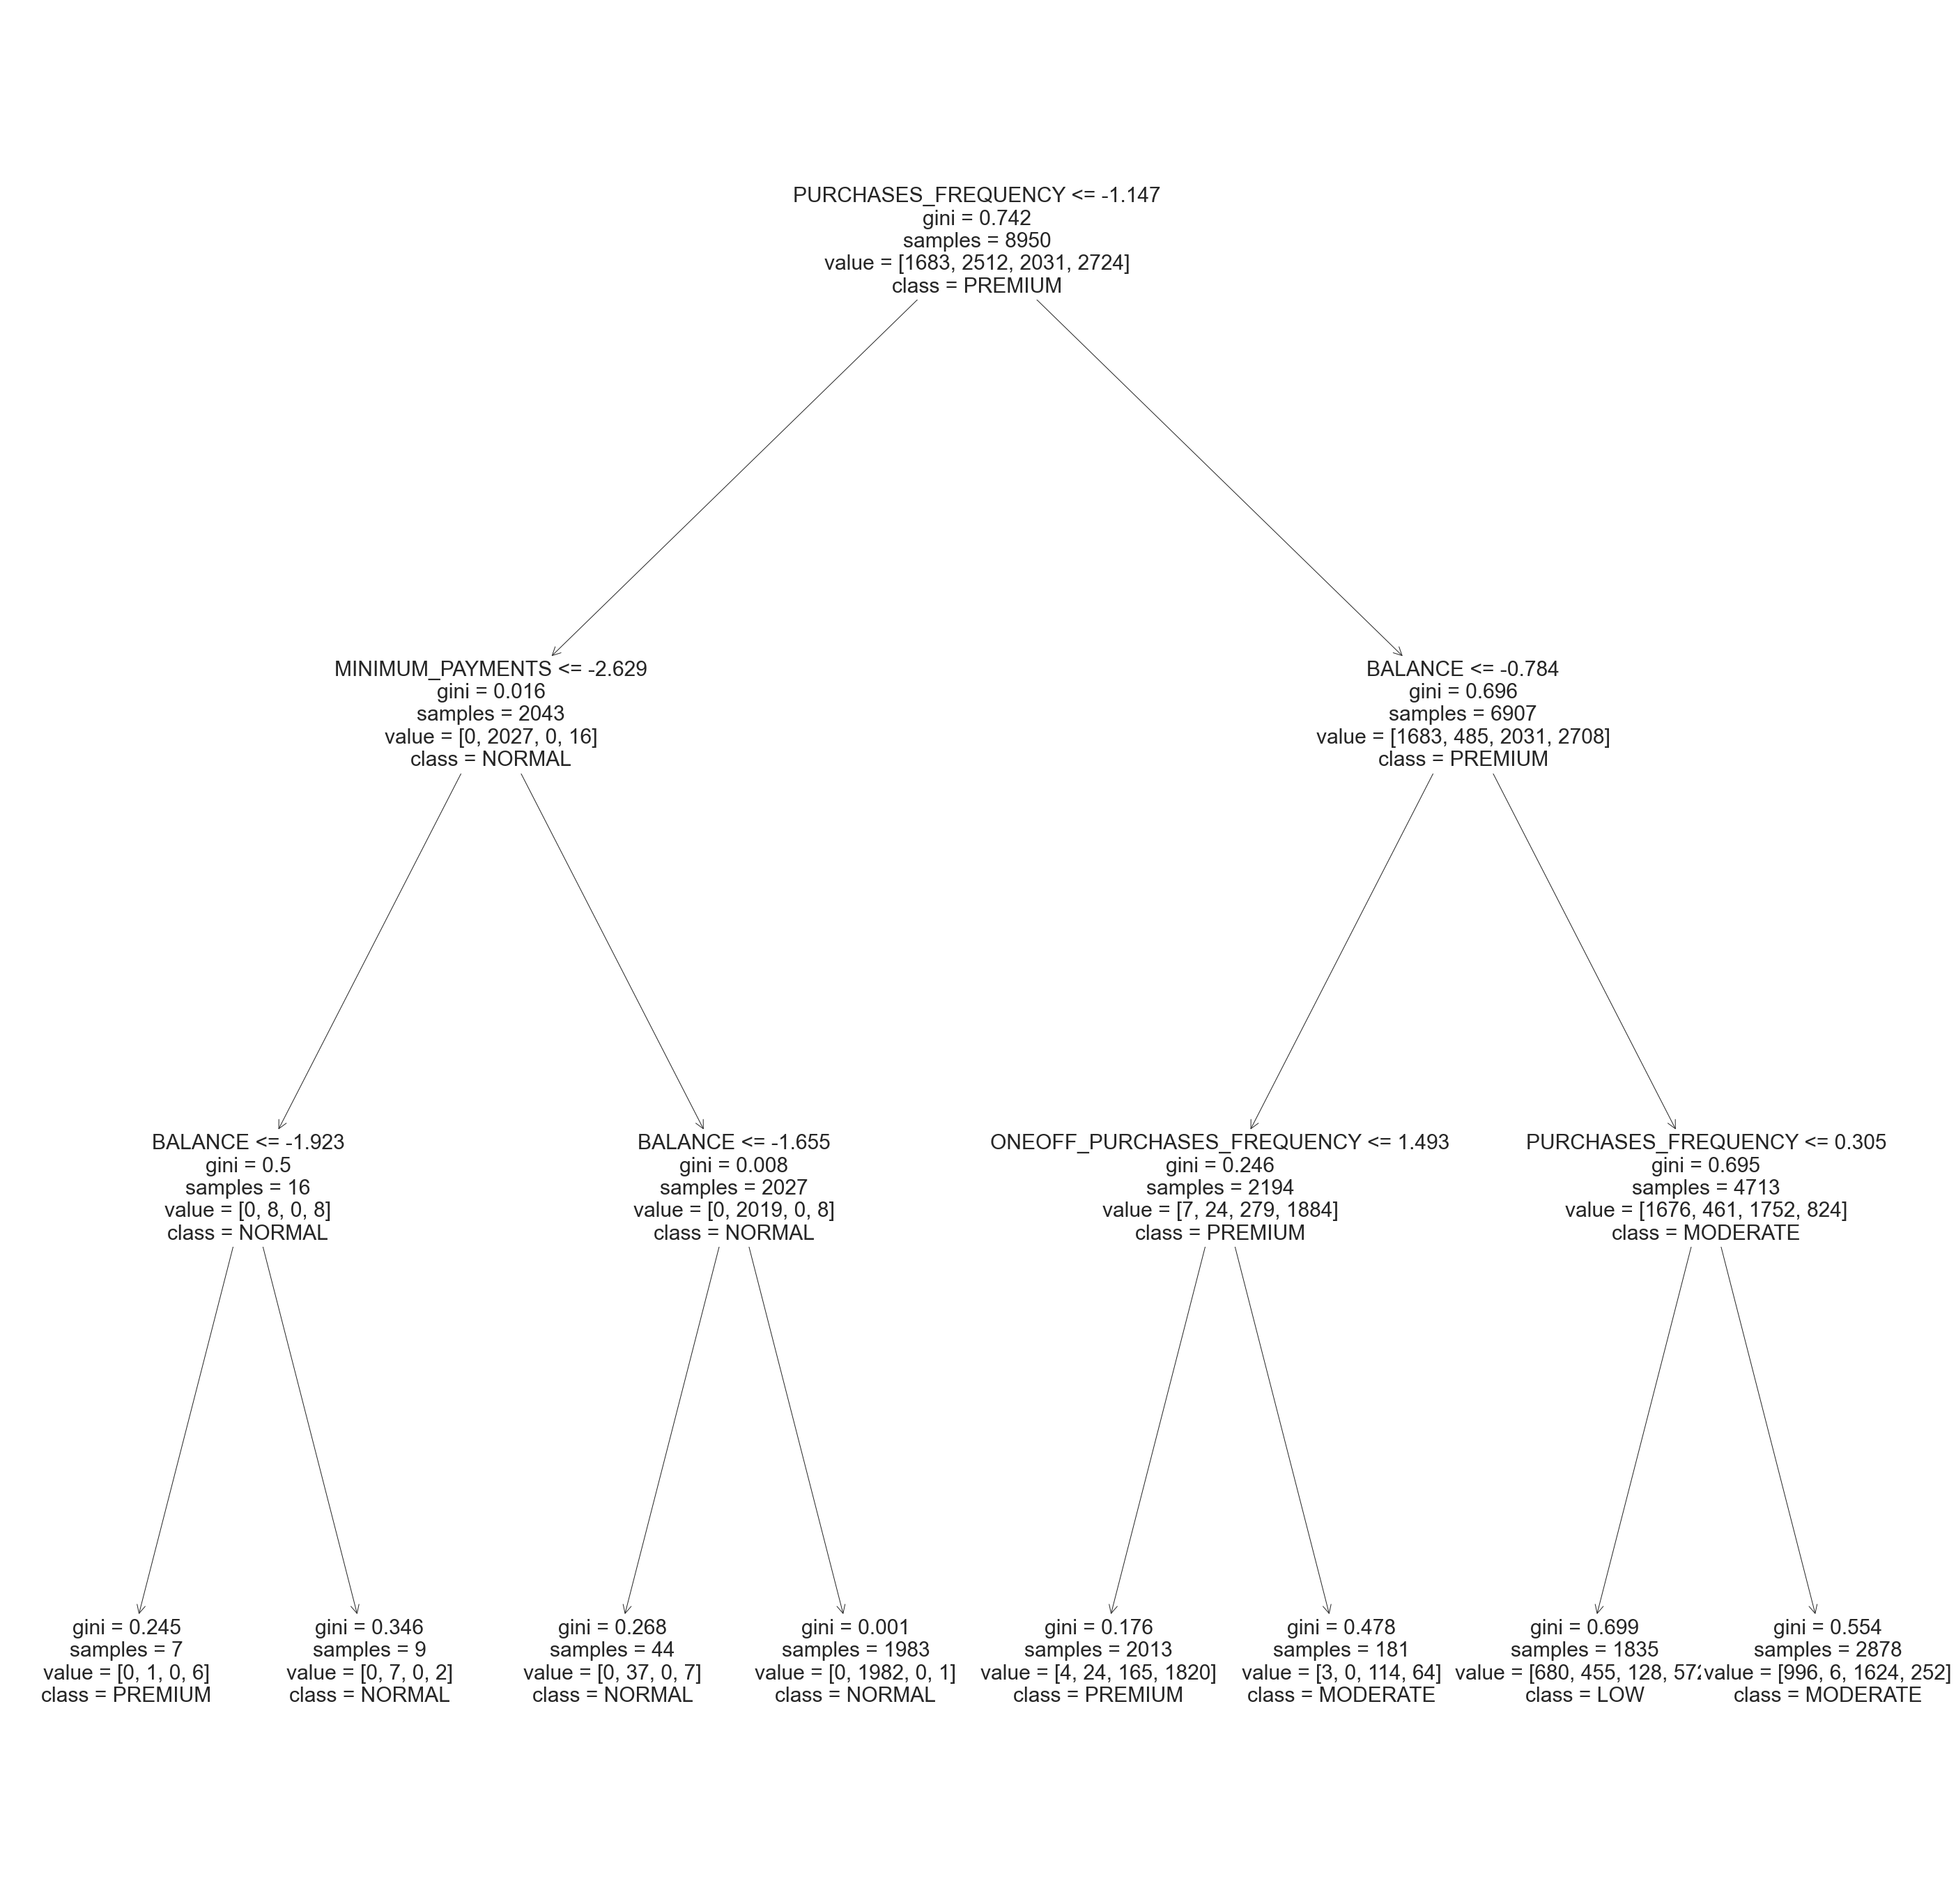

In [46]:
#plot decision tree with max depth 3 for better visualization
fig = plt.figure(figsize=(50,50))
tree.plot_tree(treeviz, feature_names=['BALANCE',
'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'PURCHASES_FREQUENCY',
'MINIMUM_PAYMENTS',
"CREDIT_LIMIT"],
class_names = ['LOW','NORMAL', 'MODERATE', 'PREMIUM'],fontsize=30
)
plt.show()

### Decision Tree Report
* Purchase Frequency is taken as Root node.
* Minimum Payments and Balance is taken as second Decision node.
* Leaf nodes has 4 Distict features Low, Normal, Moderate,Premium(just for visualization)

In [ ]:
"------------------------------------------------------------------------------------------------------------------------------"